In [14]:
import ugradio
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as pf
import lolfunctions
from astropy import units as u
import glob
import doppler
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [49]:
def peak_finder(signal_array, thresh):
    threshold = thresh*(999./1000)
    peaks = []                                                    
    for i in range(2,len(signal_array)-2): 
        if signal_array[i] > signal_array[i+1] and signal_array[i] > signal_array[i-1] and signal_array[i] > signal_array[i-2] and signal_array[i] > signal_array[i+2]:  
            if signal_array[i] > threshold: # or could do ==threshhold and set thresh = .max()                    
                peaks.append(i)
    return peaks

In [84]:
noisefiles = glob.glob('420_data/420_data/LO_*.fits')

In [92]:
files635 = glob.glob('420_data/420_data/420_data_2/LO_635*.fits')
files636 = glob.glob('420_data/420_data/420_data_2/LO_636*.fits')

In [17]:
def func(filename):
    lolavgs = np.array([])
    for i in np.arange(len(filename)):
        files_getdata = pf.getdata(filename[i])
        files_headers = pf.getheader(filename[i])
        files_open = pf.open(filename[i])
        
        nspec = files_headers['NSPEC']
        res = files_headers['RES']
        nchan = files_headers['NCHAN']
        
        avgs = np.zeros(len(files_getdata))
        for j in np.arange(nspec):
            specs = (files_open[j+1].data['auto1_real'])**2 + (files_open[j+1].data['auto0_real'])**2
            avgs = avgs + specs

        avgs = avgs/nspec
        meanavgs = avgs - np.mean(avgs)
        cutavgs = meanavgs[2500:-3500]
        if i == 0:
            lolavgs = np.append(lolavgs, cutavgs)
        else:
            lolavgs = np.vstack((lolavgs, cutavgs))
            
    return lolavgs

In [91]:
avgs635 = np.loadtxt('avgs635')
avgs636 = np.loadtxt('avgs636')

In [88]:
avgnoise = func(noisefiles)

In [87]:
onheader = pf.getheader(noisefiles[0])

In [7]:
# files_getdata = pf.getdata(filename[i])
# files_headers = pf.getheader(filename[i])
# files_open = pf.open(filename[i])
        
# nspec = files_headers['NSPEC']
# res = files_headers['RES']
# nchan = files_headers['NCHAN']

In [94]:
LO1 = 635
LO2 = 636
peaks = np.array([])
spectras635 =np.array([])
for i in np.arange(len(avgs635)):
    i = int(i)
    files_headers = pf.getheader(files635[i])

    nspec = files_headers['NSPEC']
    res = files_headers['RES']
    nchan = files_headers['NCHAN']

    cv635 = lolfunctions.airPLS(avgs635[i], lambda_= 50)[1200:,]
    cv636 = lolfunctions.airPLS(avgs636[i], lambda_= 50)[1200:,]
    
    flatavgs635 = avgs635[i][1200:,] - cv635
    flatavgs636 = avgs636[i][1200:,] - cv636
    
    sub = flatavgs635 - flatavgs636
    

    newsub = np.array([])
    for j in range(len(sub)):
        if j < 400 and sub[j] == max(sub[0:400]):
            newsub = np.append(newsub, 0)
        else:
            newsub = np.append(newsub, sub[j])
            

    newsub2 = np.array([])   
    for k in range(len(newsub)):
        if k < 400 and newsub[k] == max(newsub[0:400]):
            newsub2 = np.append(newsub2, 0)
        else:
            newsub2 = np.append(newsub2, newsub[k])
    
    if i == 0:
        spectras635 = np.append(spectras635, newsub2)
    else:
        spectras635 = np.vstack((spectras635, newsub2))
    
    LO = 635
    freqs = (np.arange(nchan) * res*u.Hz + 2 * LO * u.MHz + 144 * u.MHz).to(u.MHz).value[2500:-3500]
    
    fpeaks = peak_finder(newsub2, max(newsub2))
    
    cents = np.array([])
    for g in fpeaks:
        cents = np.append(cents, lolfunctions.centroid(freqs[1200:,][g-1:g+1],newsub2[g-1:g+1]))
        
    cents = np.mean(cents)
    print(cents)
    peaks = np.append(peaks,cents)
#     plt.figure(figsize=(8,5))

#     plt.axvline(cents)
#     plt.title(i, fontsize=17)
#     plt.xlabel('Frequency [MHZ]', fontsize=17)
#     plt.ylabel('Power', fontsize=17)
#     plt.grid(True)
#     plt.show()


1420.20448457
1420.20439281
1420.20146464
1420.19866865
1420.20148819
1420.19711929
1420.12819061
1420.1940942
1420.16055803
1420.14876443
1420.14730564
1420.14015313
1420.15165063
1420.15912541
1420.16204786
1420.14747715
1420.15179254
1420.15459709
1420.14733011
1420.19409599
1420.20440537
1420.19710071
1420.19851042
1420.19997137
1420.20144955
1420.20291526
1420.19852061
1420.19564147
1420.20734543
1420.21617442
1420.22059701
1420.23077627
1420.23078415
1420.23805364
1420.24104687
1420.24541536
1420.25269705
1420.26444746
1420.23079903
1420.23955922
1420.24980379
1420.26887577
1420.26890917
1420.2747476
1420.27614797
1420.26305094
1420.26588352
1420.25269937
1420.24685112
1420.24097802
1420.23657812
1420.23514091
1420.22344608
1420.22640518
1420.2088046
1420.19864851
1420.20142414
1420.19849357
1420.19566207
1420.19429614
1420.19270701
1420.19866397
1420.19428816
1420.1988091
1420.16192601
1420.14593404
1420.17070176
1420.15484838
1420.17086117
1420.21204532
1420.2104867
1420.179993

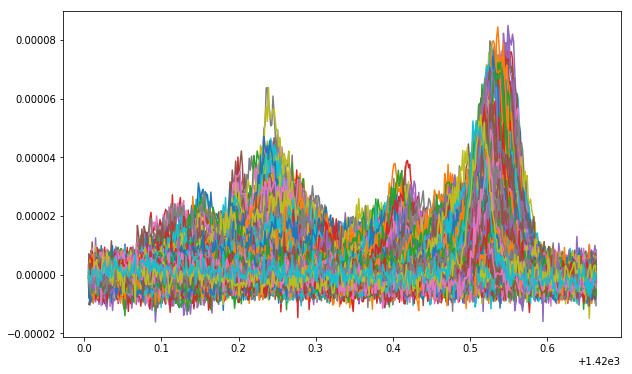

In [101]:
plt.figure(figsize=(10,6))
for i in np.arange(len(spectras635)):
    plt.plot(freqs[1200:,][400:850],spectras635[i][400:850])
plt.show()

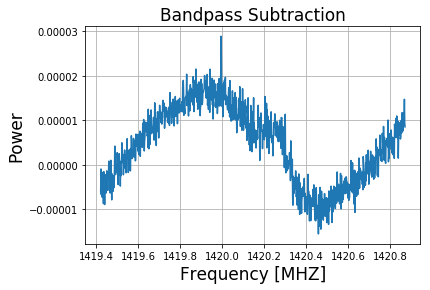

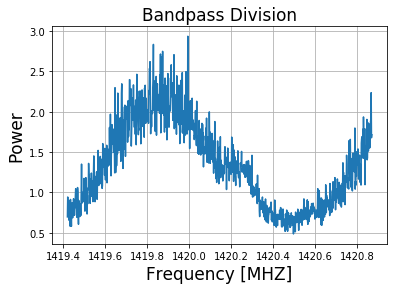

In [52]:
s1 = avgs635[213][1200:,] -avgs636[213][1200:,]
s = avgs635[213][1200:,]/avgs636[213][1200:,]
plt.plot(freqs[1200:,],s1)
plt.title("Bandpass Subtraction",fontsize=17)
plt.xlabel('Frequency [MHZ]', fontsize=17)
plt.ylabel('Power', fontsize=17)
plt.grid(True)
plt.show()
plt.plot(freqs[1200:,],s)
plt.title("Bandpass Division",fontsize=17)
plt.xlabel('Frequency [MHZ]', fontsize=17)
plt.ylabel('Power', fontsize=17)
plt.grid(True)
plt.show()

In [53]:
gal_l = np.array([])
gal_b = np.array([])
RAs = np.array([])
DECs = np.array([])
JD = np.array([])
for i in np.arange(int(len(files635))):
    head = pf.getheader(files635[i])
    glon = head['L']
    glat = head['B']
    gal_l = np.append(gal_l,glon)
    gal_b = np.append(gal_b,glat)
    ra = head['RA']
    dec = head['DEC']
    RAs = np.append(RAs,ra)
    DECs = np.append(DECs,dec)
    jd = head['JD']
    JD = np.append(JD,jd)

In [57]:
v_corrected = []
for i in range(int(len(JD))):
    vel = doppler.get_projected_velocity(RAs[i],DECs[i],JD[i],obs_lat=37.9183, obs_lon=-122.1067, 
        obs_alt=304, epoch=2451545.)
    v_corrected.append(float(vel/1000))
    
f0 = 1420.4
c = 3e5 #km/s
df = peaks - f0
v = -(df/f0)*c
print(peaks[0])
print(v[0])

1420.20448457
41.2944448244


In [55]:
actual_v1 = v - v_corrected
actual_v2 = v + v_corrected

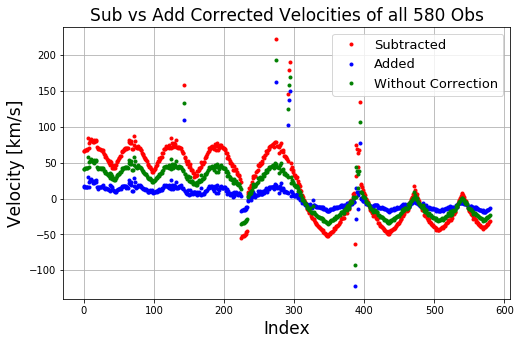

In [56]:
plt.figure(figsize=(8,5))
plt.plot(actual_v1,'r.')
plt.plot(actual_v2,'b.')
plt.plot(v,'g.')
plt.legend(['Subtracted','Added','Without Correction'],fontsize=13)
plt.ylabel('Velocity [km/s]',fontsize=17)
plt.xlabel('Index',fontsize=17)
plt.title('Sub vs Add Corrected Velocities of all 580 Obs',fontsize=17)
plt.grid(True)
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(gal_b,gal_l, actual_v1, 'r.')
ax.scatter(gal_b,gal_l, actual_v2, 'b.')
ax.set_xlabel('Galactic Longitude [Degree]', fontsize=15)
ax.set_ylabel('Galactic Latitude [Degree]', fontsize=15)
ax.set_zlabel('Velocity [km/s]', fontsize=15)
plt.show()

In [61]:
data = np.random.normal(size=(20,20))

In [146]:
l2 = np.loadtxt('gal_l_2')
b2 = np.loadtxt('gal_b_2')

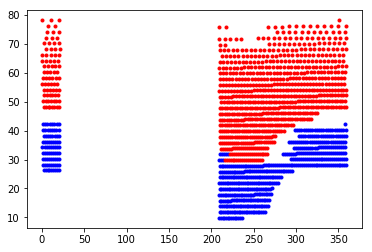

In [147]:
plt.plot(gal_l,gal_b,'b.')
plt.plot(l2,b2,'r.')

AttributeError: 'AxesSubplot' object has no attribute 'get_axis_bgcolor'

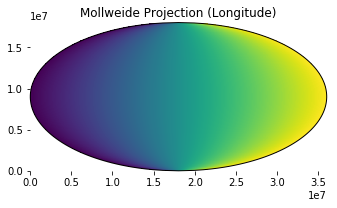

In [145]:
m = Basemap(projection='moll', lon_0=0) # Mollweide projection
lons,lats,x,y = m.makegrid(1000,500,returnxy=True) # 1000 lons by 500 lats

# Mask off parts of the image to be plotted that are outside of the map
lt = lats[:,0]
ln1 = np.ones_like(lt) * (lons[lons.shape[0]/2,0])
ln2 = np.ones_like(lt) * (lons[lons.shape[0]/2,-1])
x1,y1 = m(ln1,lt); x2,y2 = m(ln2,lt)
x = np.ma.array(x)
for c,(i,j) in enumerate(zip(x1,x2)): x[c] = np.ma.masked_outside(x[c], i, j)
mask = x.mask

plt.figure(figsize=(12,6))
plt.subplot(211)
plt.title('Mollweide Projection (Longitude)')
m.imshow(np.ma.array(lons,mask=mask))
m.drawmapboundary()
m.drawmeridians(np.arange(-180, 180, 60))
m.drawparallels(np.arange(-90,90,30)[1:], labels=[0,1,0,0], labelstyle='+/-')
plt.colorbar()
plt.subplot(212)
plt.title('Mollweide Projection (Latitude)')
m.imshow(np.ma.array(lats,mask=mask))
m.drawmapboundary()
m.drawmeridians(np.arange(-180, 180, 60))
m.drawparallels(np.arange(-90,90,30)[1:], labels=[0,1,0,0], labelstyle='+/-')
plt.colorbar()
plt.show()

(90L, 170L)
(90L, 170L)


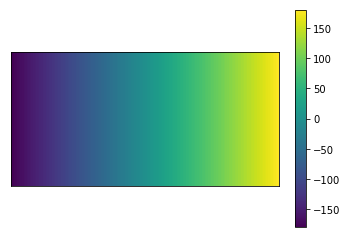

In [144]:
lon, lat = m.makegrid(170,90)
print(lon.shape)
print(lat.shape)
m.imshow(lon)
plt.colorbar()
plt.show()